In [53]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, cross_val_score,train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier, BaggingClassifier
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold, cross_val_predict
import random as rm
from sklearn import metrics
from sklearn import impute
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time as time
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.model_selection import RepeatedKFold

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Loading Data

In [189]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

### Predictor Descriptions
*By Catherine Erickson*

**pH value: Evaluates the acid-base balance of water. Also the indicator of acidic or alkaline condition of water status. WHO recommends max permissible limit of pH from 6.5 to 8.5 for potability.**

**Hardness: Mainly caused by calcium and magnesium salts, dissolved from the geologic deposits where water travels. The longer water is in contact with this material helps determine how much hardness there is in the water.**

**Solids (Total Dissolved Solids): Minerals (organic and inorganic) dissolved in water that produce an unwanted taste and color in water. High TDS means the water is highly mineralized. Limits of TDS for drinking water are from 500mg/l to 1000 mg/l.**

**Chloramines: Chloramines formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 mg/L are safe to drink.**

**Sulfate: Naturally occurring substances in minerals, soil, and rocks. Also used in the chemical industry. Ranges from 3-30mg/L in most freshwater supplies.**

**Conductivity: Pure water is not a good conudctor. Increase in the concentation of ions enhances the conductivity. EC value should not exceed 400 uS/cm**

**Organic carbon: Comes from decaying natural organic matter and synthetic sources. < 2 mg/L as TOC in treated/drinking water recommended.**

**Trihalomethanes: THMs are a chemical found in water treated with chlorine. THM levels up to 80 ppm is considered safe in drinking water.**

**Turbidity: Dependent on the quantity of solid matter present in the suspended state. WHY recommended value of 5.00 NTU.**

**Potability: 1 means potable and 0 means not potable**

### df info
*By Catherine Erickson*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Distribution of response
*By Ally Bardas*

In [7]:
# Creating a pie chart of the response variable (potability)
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0, opacity = 0.7,
                                               labels = {"label":"Potability", "Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability"))
fig.update_traces(textposition = "outside", textinfo = "percent + label")
fig.show()

### Separating X and y and Scaling X
*By Catherine Erickson*

In [190]:
X = df.drop(columns= 'Potability')
y = df['Potability']

*We scaled all variables because they are all continuous and on very different scales with different units of measurement. We did not want the numbers on a larger scale to dominate in any way.*

In [191]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### Data cleaning
*By Ally Bardas and Catherine Erickson*

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

*Because this dataset has around 3,000 observations with 1,000 observations having missing values, we did not want to drop 1/3 of this information.* 

**Using KNN to impute missing values**

In [11]:
MSE_whole_data = []
#Iterate over the potential optimal values of the hyperparameter 'k' of the KNN algorithm
for k in range(1, 51):
    #Impute the missing values of X_scaled (5380 rows, 765 columns) with the 'k' under consideration
    #Let us call the imputed dataset as 'X_imputed_k'. This dataset has no missing values.
    imputer = KNNImputer(n_neighbors=k)
    X_imputed_k = imputer.fit_transform(X_scaled)
    X_imputed_k = pd.DataFrame(X_imputed_k, columns=X_scaled.columns)
    MSE_multiplied = []
    MSE = []
    #Iterate over each predictor in the data
    for predictor in X_scaled.columns:
        #If there are no missing values in 'predictor', skip the lines below, and continue with the next predictor
        if X_scaled[predictor].isna().sum() == 0:
            continue
        #Remove the observations from 'X_imputed_k', where the 'predictor' has actual missing values.
        #We don't know the true values of those observations for the 'predictor' column, and hence cannot 
        #compute the cross-validation error on them. Let the dataframe with the removed observations be
        #X_imputed_non_missing_k 
        missing_mask = X_scaled[predictor].isna()
        X_imputed_non_missing_k = X_imputed_k.loc[~missing_mask, :]
        #Similarly, remove the observations that have missing values in 'predictor' and call the 
        #resulting Series as 'predictor_nonmissing'
        predictor_nonmissing = X_scaled.loc[~missing_mask, predictor]
        #Consider 'predictor_nonmissing' as the response, and 'X_imputed_non_missing_k' as predictors
        knn = KNeighborsRegressor(n_neighbors=k)
        #Use cross_val_score to compute the 5-fold cross-validated MSE when 'predictor_nonmissing' is 
        #predicted using 'X_imputed_non_missing_k' as the set of predictors, with the KNN model having
        #K = k
        cv_scores= -cross_val_score(knn, X_imputed_non_missing_k, predictor_nonmissing, cv=5, scoring='neg_mean_squared_error')
        #Compute the weighted average of MSEs, and then MSE_whole_data_k as mentioned in steps 6-7 of the announcement
        MSE.append(np.mean(cv_scores))
        MSE_multiplied.append(np.mean(cv_scores) * missing_mask.sum())
    total_se_k = sum(MSE_multiplied)
    MSE_whole_data_k = total_se_k / X_scaled.isnull().sum().sum()
    MSE_whole_data.append(MSE_whole_data_k)

In [12]:
# Find optimal K
optimal_k = np.argmin(MSE_whole_data) + 1
MSE_optimal_k = MSE_whole_data[optimal_k - 1]
print("Optimal K:", optimal_k)
print('MSE for the optimal K:', MSE_optimal_k)

Optimal K: 5
MSE for the optimal K: 0.16072247870117018


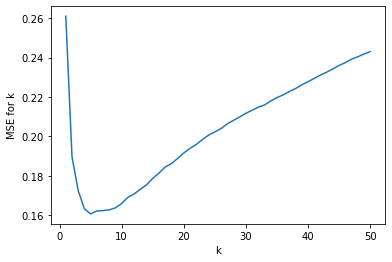

In [13]:
#plot MSEwhole_data_k vs k, and report the (2) optimal K, (3) MSEwhole_data_K for the optimal K
# Plot MSEwhole_data_k vs k
plt.plot(range(1, 51), MSE_whole_data)
plt.xlabel('k')
plt.ylabel('MSE for k')
plt.show()

In [192]:
# Select the columns with missing values
columns_with_missing = ['ph', 'Sulfate', "Trihalomethanes"]

# Create a copy of the DataFrame
impute_X = X_scaled.copy()

# Perform KNN imputation with the optimal K value
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_data = imputer.fit_transform(impute_X[columns_with_missing])

# Update the original DataFrame with the imputed values
X_scaled[columns_with_missing] = imputed_data

In [193]:
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.209627,0.259195,-0.139471,0.112415,0.838973,1.708954,-1.180651,1.273445,-1.286298
1,-2.110818,-2.036414,-0.385987,-0.307694,-0.512637,2.062575,0.270597,-0.622493,0.684218
2,0.638838,0.847665,-0.240047,1.360594,-0.333799,-0.094032,0.781117,0.001472,-1.167365
3,0.775374,0.547651,0.000493,0.592008,0.558106,-0.778830,1.255134,2.098969,0.848412
4,1.261849,-0.464429,-0.460249,-0.363698,-0.570898,-0.343939,-0.824357,-2.126974,0.138786


## Exploratory data analysis
*By Catherine Erickson*

In [20]:
df = pd.concat([X_scaled, y], axis=1)

In [23]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.209627,0.259195,-0.139471,0.112415,0.838973,1.708954,-1.180651,1.273445,-1.286298,0
1,-2.110818,-2.036414,-0.385987,-0.307694,-0.512637,2.062575,0.270597,-0.622493,0.684218,0
2,0.638838,0.847665,-0.240047,1.360594,-0.333799,-0.094032,0.781117,0.001472,-1.167365,0
3,0.775374,0.547651,0.000493,0.592008,0.558106,-0.778830,1.255134,2.098969,0.848412,0
4,1.261849,-0.464429,-0.460249,-0.363698,-0.570898,-0.343939,-0.824357,-2.126974,0.138786,0


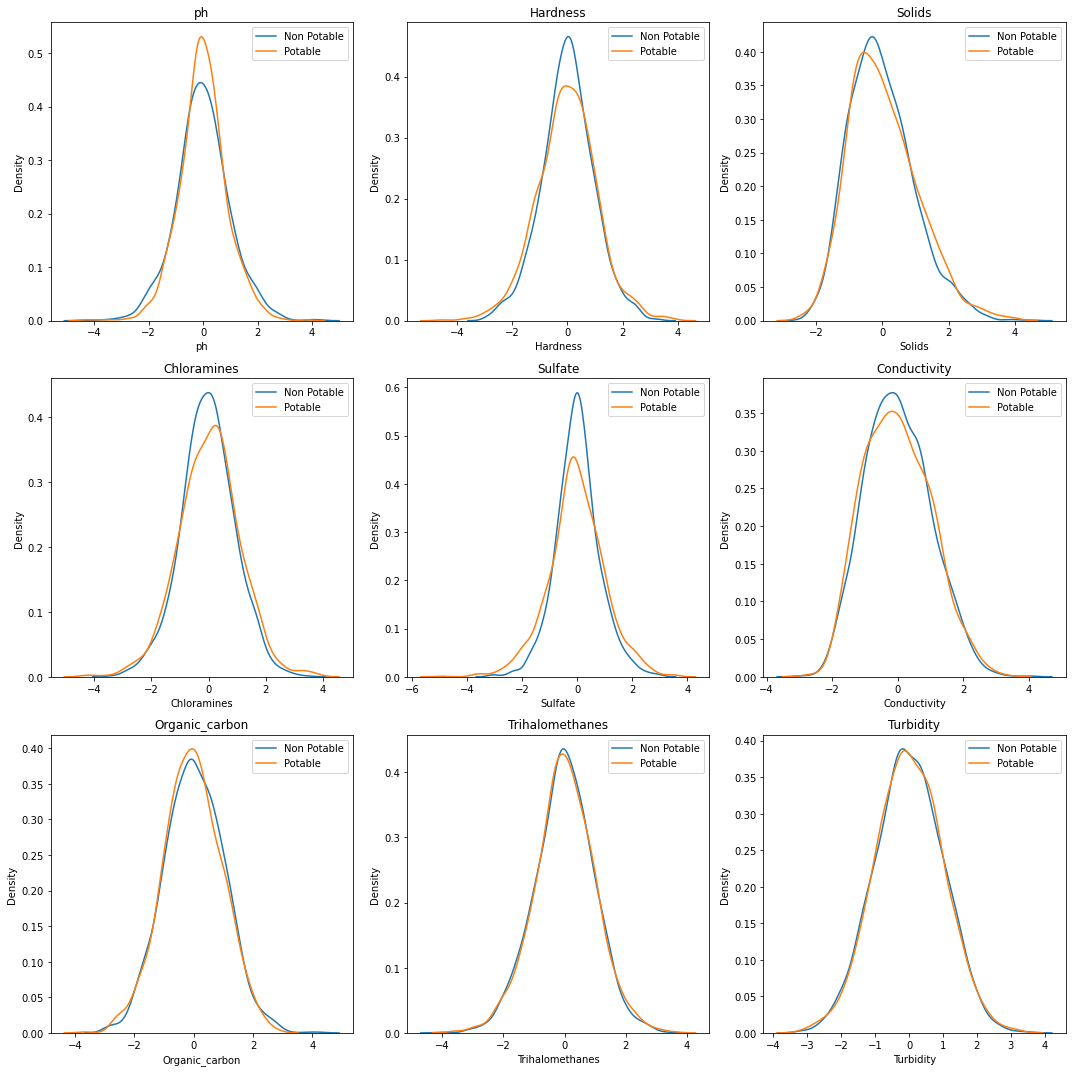

In [24]:
#create two different dataframes, one for potable water and one for nonpotable water
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
#Loop over all predictors and create subplots
for ax, col in  enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col) #set title of the subplot as the column name
    #create density plot for non potable
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    #create density plot for potable
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

*Every predictor has enough variance to make it possible it will influence the response. There is also some variance in density for numbers corresponding to non potable and those corresponding to potable for most variables.*

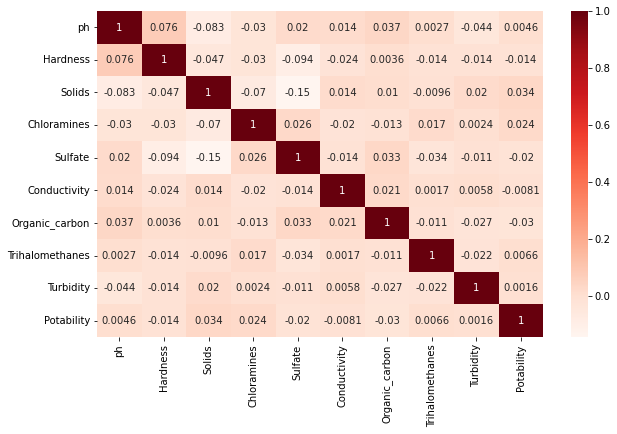

In [26]:
#heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.show()

*No predictors are highly correlated and impacting other predictors.*

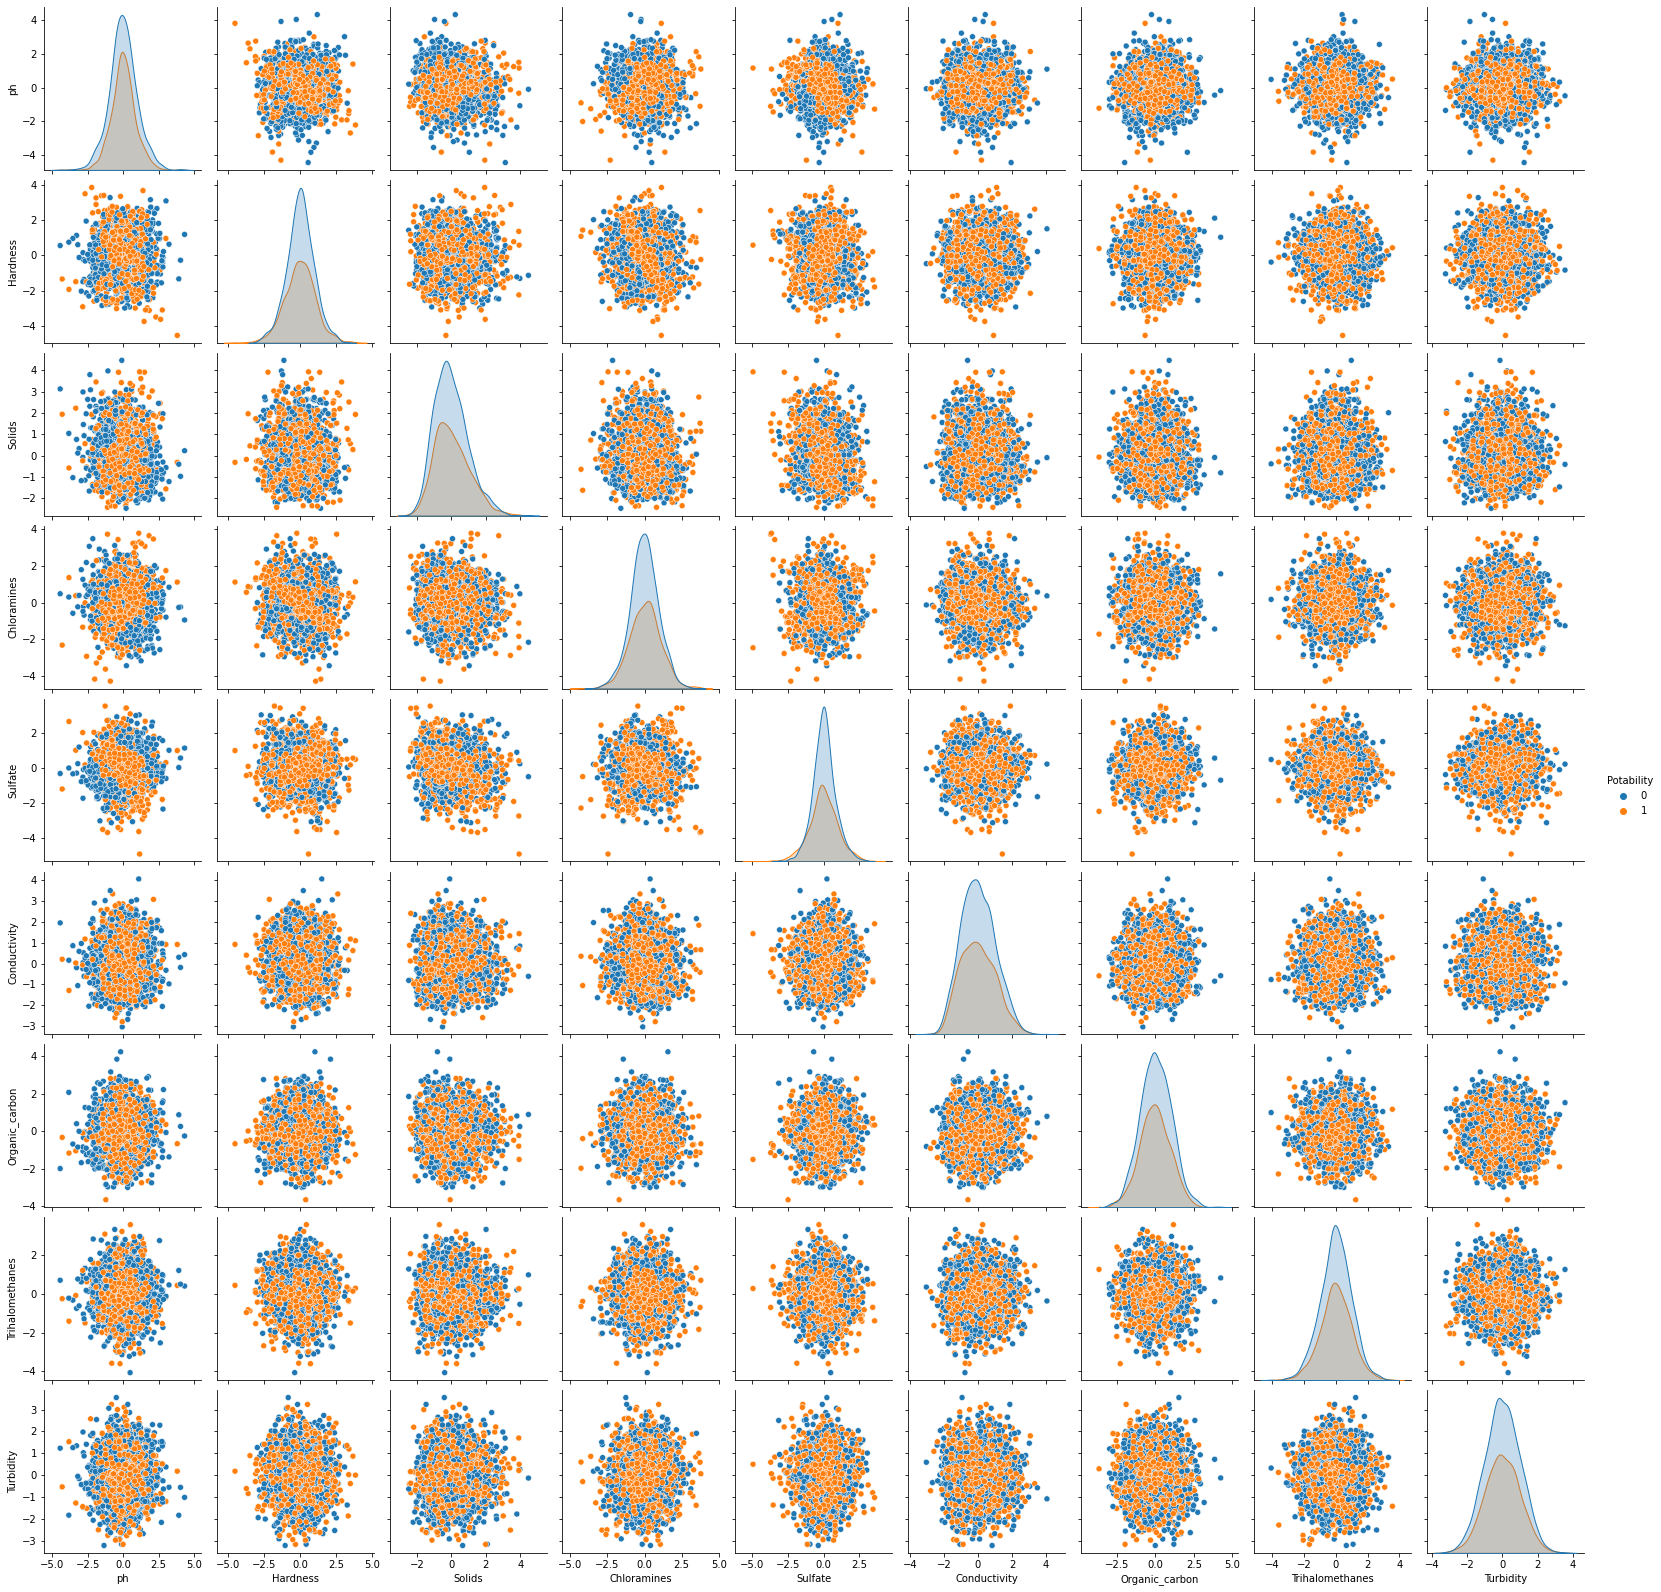

In [28]:
#creating a scatterplot pairplot by potability
sns.pairplot(df, hue='Potability')

plt.show()

*There are very few clear trends between any of the predictors. There may be a linear trend between hardness and chloramines for potable water. However, the hue difference between potable and non potable shows that there is difference between values that correspond to potable and those that correspond to non potable*

In [29]:
#finding how many unique values in each predictor
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))

In [30]:
uni(df)


 All Unique Value in ph
[-4.44206196 -4.29934282 -3.83004337 ...  3.93285022  4.05289268
  4.34069079]
Total no of unique values 3243

 All Unique Value in Hardness
[-4.53045357 -3.73774064 -3.61705978 ...  3.49856609  3.67968287
  3.85568047]
Total no of unique values 3276

 All Unique Value in Solids
[-2.47434411 -2.42782907 -2.37419836 ...  3.93220782  3.97545828
  4.47268894]
Total no of unique values 3276

 All Unique Value in Chloramines
[-4.27728822 -4.16461042 -3.62095607 ...  3.65791738  3.74107121
  3.79363099]
Total no of unique values 3276

 All Unique Value in Sulfate
[-4.94525473 -3.70863188 -3.65572917 ...  3.42831901  3.4476932
  3.55614728]
Total no of unique values 3229

 All Unique Value in Conductivity
[-3.02829014 -2.77911859 -2.67146782 ...  3.33075936  3.48985553
  4.048144  ]
Total no of unique values 3276

 All Unique Value in Organic_carbon
[-3.6536346  -2.99700709 -2.96832414 ...  3.1655102   3.84614734
  4.23714718]
Total no of unique values 3276

 All Uniq

*All predictors have a very high number of unique values (besides potability because it is binary). There is high variance for every predictor.*

## Data Preparation

### Train-Test Split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 45)

In [195]:
X_train.shape

(2620, 9)

# Developing the model: Hyperparameter tuning

## Single Decision Tree
*By Catherine Erickson*

### Baseline

In [227]:
#model with no hyperparameter tuning
model=DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [228]:
print("Maximum tree depth =", model.get_depth())
print("Maximum leaves =", model.get_n_leaves())

Maximum tree depth = 27
Maximum leaves = 526


*The decision threshold graph for a full grown decision tree doesn't matter because each node just has a zero or one, meaning the decision threshold doesn't matter.*

Accuracy:  58.778625954198475
ROC-AUC:  0.5716062191415937
Precision:  0.4712430426716141
Recall:  0.49901768172888017


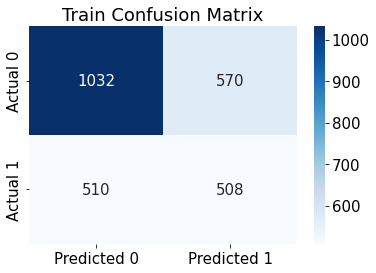

In [230]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.5

y_pred_prob = cross_val_predict(DecisionTreeClassifier(random_state=1), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  58.231707317073166
ROC-AUC:  0.5635586635586636
Precision:  0.47307692307692306
Recall:  0.47307692307692306


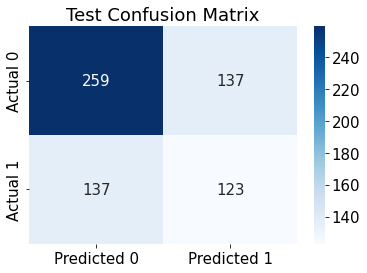

In [231]:
# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.5

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

### Tuning Singular Decision Tree

**Coarse-Grid Tuning**

In [68]:
#Defining parameters and the range of values over which to optimize
# Using the max_depth and max_leaf_nodes from the baseline model for the max parameters
param_grid = {    
    'max_depth': range(4, 29, 2),
    'max_leaf_nodes': range(2,536, 10),
    'max_features': range(1, 10)
}

In [69]:
#Grid search to optimize parameter values
start_time = time.time()
skf = StratifiedKFold(n_splits=5)#The folds are made by preserving the percentage of samples for each class.

# Define a GridSearchCV object to search for optimal parameters from the param_grid
# The best model will be refit based on precision
# StratifiedKFold cross-validation with 5 folds is used
# n_jobs=-1 utilizes all available CPU cores for parallel processing
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, scoring=['precision','recall'], 
                           refit="precision", cv=skf, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

print('Best Precision Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for precision')
print(grid_search.best_params_)

print("Time taken =", round((time.time() - start_time)), "seconds")


Fitting 5 folds for each of 6318 candidates, totalling 31590 fits


/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

Best accuracy Through Grid Search : 0.631
Best params for precision
{'max_depth': 8, 'max_features': 9, 'max_leaf_nodes': 12}
Time taken = 69 seconds


In [66]:
model = DecisionTreeClassifier(random_state=1, max_depth=8, max_features=9, max_leaf_nodes=12).fit(X_train, y_train)

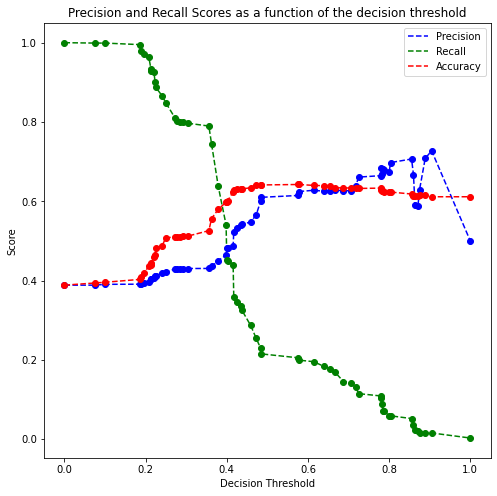

In [56]:
# Using cross_val_predict to obtain predicted probabilities of the positive class
cross_val_ypred=cross_val_predict(DecisionTreeClassifier(random_state=1, max_depth=8,
                                                        max_leaf_nodes=12, max_features=9), X_train,
                                 y_train, cv=5, method='predict_proba')

# Calculating precision, recall, and thresholds using precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:, 1])
# Creating an array to store accuracy scores for different thresholds
acc=np.ndarray(shape=(len(thresholds),))
# Looping over the thresholds and calculating accuracy scores
i=0
for th in thresholds:
    y_pred = cross_val_ypred[:, 1]>th
    y_pred=y_pred.astype(int)
    acc[i]=accuracy_score(y_pred, y_train)
    i = i+1
# Defining a function to plot precision, recall, and accuracy scores against decision thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.plot(thresholds, acc, "r--", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color='blue')
    plt.plot(thresholds, recalls[:-1], "o", color='green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc="best")
    plt.legend()
# Calling the function to plot precision, recall, and accuracy scores against thresholds
plot_precision_recall_vs_threshold(p, r, thresholds)

Accuracy:  64.12213740458014
ROC-AUC:  0.6121155039501212
Precision:  0.6147058823529412
Recall:  0.20530451866404714


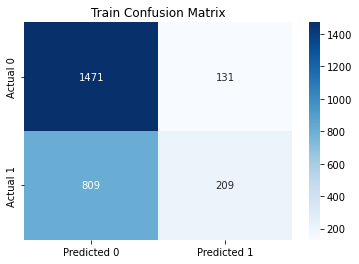

In [64]:
# Tune threshold on the train confusion matrix

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.5

y_pred_prob = cross_val_predict(DecisionTreeClassifier(random_state=1, max_depth=8,
                                                        max_leaf_nodes=12, max_features=9), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  61.737804878048784
ROC-AUC:  0.5375971250971251
Precision:  0.6153846153846154
Recall:  0.09230769230769231


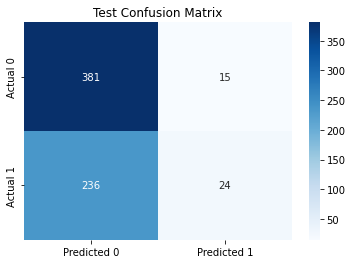

In [67]:
# Print the performance with the tuned threshold on test data

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.5

y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

*Will now perform finer-grid tuning to see if the model improves.*

**Finer-Grid Tuning**

In [70]:
#Defining parameters and the range of values over which to optimize
#Changed the ranges for max_depth and max_lef_nodes.
#coarse-grid chose 8 max_depth in range 4-29 counting by 2s. Changed the range in finer grid to 6-10 counting by 1.
#coarse-grid chose 12 max_leaf nodes in range 2-536 counting by 10s. Changed the range in finer grid to 2-22 counting by 1.
param_grid = {    
    'max_depth': range(6, 10),
    'max_leaf_nodes': range(2, 22),
    'max_features': range(1,10)
}

In [71]:
#Grid search to optimize parameter values
start_time = time.time()
skf = StratifiedKFold(n_splits=5)#The folds are made by preserving the percentage of samples for each class.

# Define a GridSearchCV object to search for optimal parameters from the param_grid
# The best model will be refit based on precision
# StratifiedKFold cross-validation with 5 folds is used
# n_jobs=-1 utilizes all available CPU cores for parallel processing
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, scoring=['precision','recall'], 
                           refit="precision", cv=skf, n_jobs=-1, verbose = True)
grid_search.fit(X_train, y_train)

print('Best Precision Through Grid Search : %.3f'%grid_search.best_score_)

print('Best params for precision')
print(grid_search.best_params_)

print("Time taken =", round((time.time() - start_time)), "seconds")


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

Best accuracy Through Grid Search : 0.654
Best params for precision
{'max_depth': 6, 'max_features': 2, 'max_leaf_nodes': 20}
Time taken = 8 seconds


In [84]:
#Defining the model with the new hyperparameters
model = DecisionTreeClassifier(random_state=1, max_depth=6, max_features=2, max_leaf_nodes=20).fit(X_train, y_train)

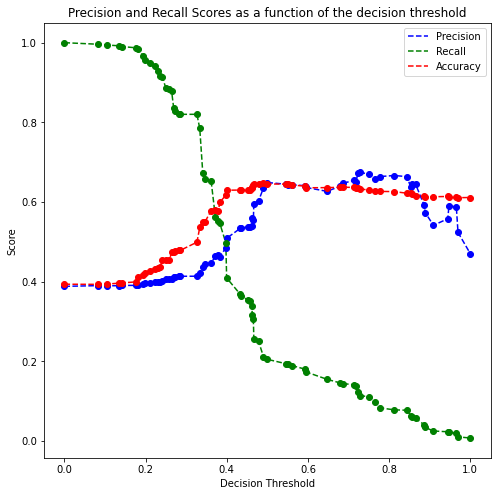

In [73]:
# Using cross_val_predict to obtain predicted probabilities of the positive class
cross_val_ypred=cross_val_predict(DecisionTreeClassifier(random_state=1, max_depth=6, max_features=2, max_leaf_nodes=20), X_train,
                                 y_train, cv=5, method='predict_proba')

# Calculating precision, recall, and thresholds using precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:, 1])
# Creating an array to store accuracy scores for different thresholds
acc=np.ndarray(shape=(len(thresholds),))
# Looping over the thresholds and calculating accuracy scores
i=0
for th in thresholds:
    y_pred = cross_val_ypred[:, 1]>th
    y_pred=y_pred.astype(int)
    acc[i]=accuracy_score(y_pred, y_train)
    i = i+1
# Defining a function to plot precision, recall, and accuracy scores against decision thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.plot(thresholds, acc, "r--", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color='blue')
    plt.plot(thresholds, recalls[:-1], "o", color='green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc="best")
    plt.legend()
# Calling the function to plot precision, recall, and accuracy scores against thresholds
plot_precision_recall_vs_threshold(p, r, thresholds)

Accuracy:  64.65648854961832
ROC-AUC:  0.6090477521958062
Precision:  0.6352941176470588
Recall:  0.21218074656188604


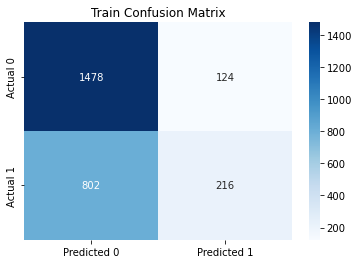

In [82]:
# Tune threshold on the train confusion matrix

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.49

y_pred_prob = cross_val_predict(DecisionTreeClassifier(random_state=1, max_depth=6, max_features=2, max_leaf_nodes=20), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  61.28048780487805
ROC-AUC:  0.5593531468531469
Precision:  0.5714285714285714
Recall:  0.09230769230769231


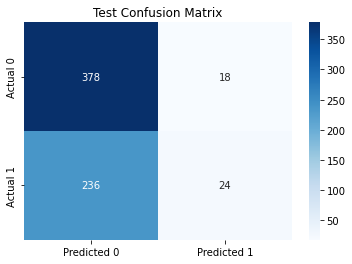

In [85]:
# Print the performance with the tuned threshold on test data

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.549
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

*Finer grid tuning did not increase performance. Perhaps bagging will perform better.*

## Bagging Decision Tree
*By Catherine Erickson*

### Visualizing the optimal number of trees

In [179]:
#Finding model accuracy vs number of trees
oob_accuracy={};test_accuracy={};oob_rmse={};test_rmse = {}
#Looping over number of trees from 10 to 500
for i in np.linspace(10,500,40,dtype=int):
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=i, random_state=1,
                        n_jobs=-1,oob_score=True).fit(X_train, y_train)
    oob_accuracy[i]=model.oob_score_  #Returns the out-of_bag R-squared of the model
    test_accuracy[i]=model.score(X_test,y_test) #Returns the test R-squared of the model

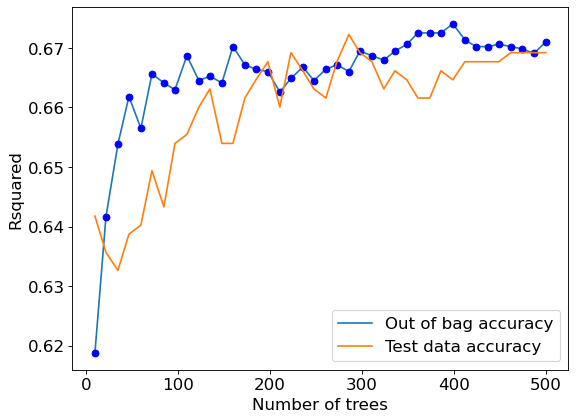

In [180]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6), dpi=80)
#Creating a line plot of the out of bag accuracy per number of trees
plt.plot(oob_accuracy.keys(),oob_accuracy.values(),label = 'Out of bag accuracy')
plt.plot(oob_accuracy.keys(),oob_accuracy.values(),'o',color = 'blue')
#Creating a line plot of the test data accuracy per number of trees
plt.plot(test_accuracy.keys(),test_accuracy.values(), label = 'Test data accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Rsquared')
plt.legend()

### Baseline Bagged Decision Tree with 400 Trees

*Chose 400 trees because that's where the accuracy peaks*

In [214]:
#Bagging the results of 400 decision trees to predict potability
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=400, random_state=1,
                        n_jobs=-1).fit(X_train, y_train)

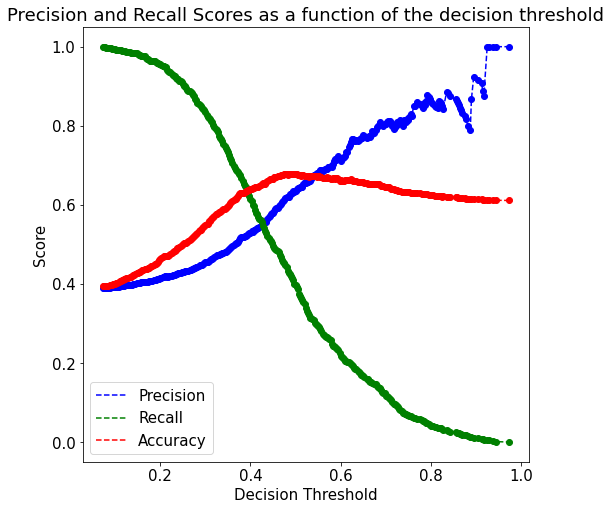

In [202]:
# Using cross_val_predict to obtain predicted probabilities of the positive class
cross_val_ypred=cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=400, random_state=1,
                        n_jobs=-1), X_train,
                                 y_train, cv=5, method='predict_proba')

# Calculating precision, recall, and thresholds using precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:, 1])
# Creating an array to store accuracy scores for different thresholds
acc=np.ndarray(shape=(len(thresholds),))
# Looping over the thresholds and calculating accuracy scores
i=0
for th in thresholds:
    y_pred = cross_val_ypred[:, 1]>th
    y_pred=y_pred.astype(int)
    acc[i]=accuracy_score(y_pred, y_train)
    i = i+1
# Defining a function to plot precision, recall, and accuracy scores against decision thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.plot(thresholds, acc, "r--", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color='blue')
    plt.plot(thresholds, recalls[:-1], "o", color='green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc="best")
    plt.legend()
# Calling the function to plot precision, recall, and accuracy scores against thresholds
plot_precision_recall_vs_threshold(p, r, thresholds)

Accuracy:  66.7175572519084
ROC-AUC:  0.6897732206058733
Precision:  0.718562874251497
Recall:  0.2357563850687623


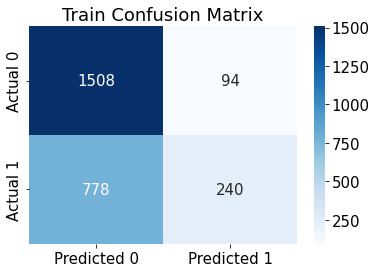

In [213]:
# Tune threshold on the train confusion matrix

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.59

y_pred_prob = cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=400, random_state=1,
                        n_jobs=-1), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  66.15853658536585
ROC-AUC:  0.6692064879564881
Precision:  0.7567567567567568
Recall:  0.2153846153846154


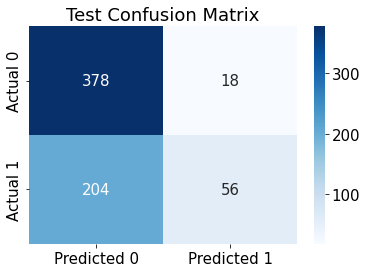

In [215]:
# Print the performance with the tuned threshold on test data

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.59
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

*The baseline bagged model already performed better than the tuned singular decision tree. Perhaps tuning will improve the model more.*

**Hyperparameter tuning 1**

In [105]:
# Defining the parameter grid
# Base_estimator = DecisionTreeClassifier because we are bagging decision trees
#Very high range for n_estimators because oob accuracy and test accuracy keep increasing for n_estimators based on the visualization
#coarse grid search of max_samples and max_features
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],#Comparing bagging with a linear regression model as well
          'n_estimators': [150,250,350,500],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

# Define a GridSearchCV object to search for optimal parameters from the param_grid
# The best model will be refit based on precision
# KFold cross-validation with 5 folds is used
# n_jobs=-1 utilizes all available CPU cores for parallel processing
cv = KFold(n_splits=5,shuffle=True,random_state=1)
bagging_classifier_grid = GridSearchCV(BaggingClassifier(random_state=1, n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1,
                                      scoring = ['precision', 'recall'], refit='precision')
bagging_classifier_grid.fit(X_train, y_train)

print('Train precision : %.3f'%bagging_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test precision : %.3f'%bagging_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best precision Through Grid Search : %.3f'%bagging_classifier_grid.best_score_)
print('Best Parameters : ',bagging_classifier_grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Train accuracy : 1.000
Test accuracy : 0.631
Best accuracy Through Grid Search : 0.705
Best Parameters :  {'base_estimator': DecisionTreeClassifier(random_state=1), 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}


In [107]:
#Defining the model with optimal parameters
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=500, 
                          random_state=1,max_features=0.5, oob_score=True,
                        max_samples=0.5,n_jobs=-1,bootstrap=True,bootstrap_features=True).fit(X_train, y_train)

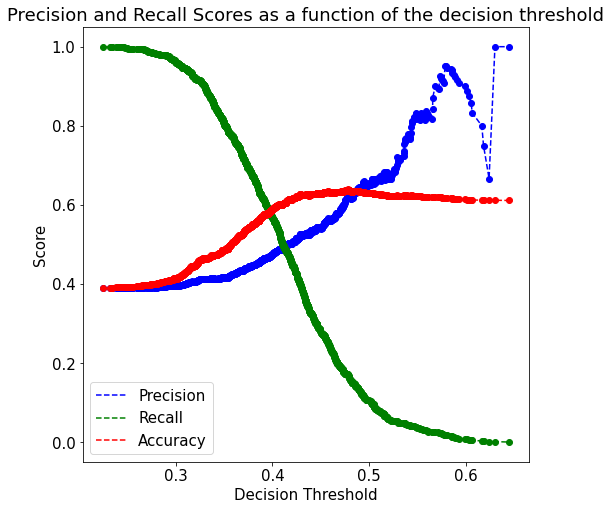

In [109]:
# Using out of bag to find predictions
ypred = model.oob_decision_function_[:,1]

# Calculating precision, recall, and thresholds using precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, ypred)
# Creating an array to store accuracy scores for different thresholds
acc=np.ndarray(shape=(len(thresholds),))
# Looping over the thresholds and calculating accuracy scores
i=0
for th in thresholds:
    y_pred = ypred>th
    y_pred=y_pred.astype(int)
    acc[i]=accuracy_score(y_pred, y_train)
    i = i+1
# Defining a function to plot precision, recall, and accuracy scores against decision thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.plot(thresholds, acc, "r--", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color='blue')
    plt.plot(thresholds, recalls[:-1], "o", color='green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc="best")
    plt.legend()
# Calling the function to plot precision, recall, and accuracy scores against thresholds
plot_precision_recall_vs_threshold(p, r, thresholds)

Accuracy:  64.23664122137404
ROC-AUC:  0.6047355466766738
Precision:  0.5805168986083499
Recall:  0.2868369351669941


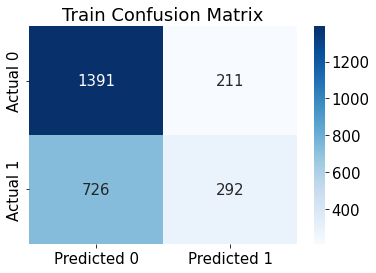

In [201]:
# Tune threshold on the train confusion matrix

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.45

y_pred_prob = cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=500, 
                          random_state=1,max_features=0.5, oob_score=True,
                        max_samples=0.5,n_jobs=-1,bootstrap=True,bootstrap_features=True), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  64.48170731707317
ROC-AUC:  0.6108731546231546
Precision:  0.6238532110091743
Recall:  0.26153846153846155


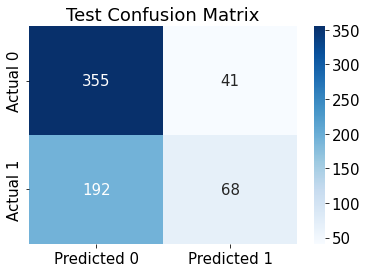

In [121]:
# Print the performance with the tuned threshold on test data

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.45
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

*This model performs worse than the baseline. I will continue tuning.*

**Hyperparameter tuning 2**

In [122]:
#Adjusting parameters based on previous model
#Getting more specific with n_estimators and going a little higher, getting more specific with max_samples and max_features as well
params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [450, 500, 550],
          'max_samples': [0.25, 0.5, 0.75],
          'max_features': [0.25, 0.5, 0.75],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

# Define a GridSearchCV object to search for optimal parameters from the param_grid
# The best model will be refit based on precision
# KFold cross-validation with 5 folds is used
# n_jobs=-1 utilizes all available CPU cores for parallel processing
cv = KFold(n_splits=5,shuffle=True, random_state=1)
bagging_classifier_grid = GridSearchCV(BaggingClassifier(random_state=1,n_jobs=-1), 
                                      param_grid =params, cv=cv, n_jobs=-1, verbose=1,
                                      scoring = ['precision', 'recall'], refit='precision')
bagging_classifier_grid.fit(X_train, y_train)

print('Train precision : %.3f'%bagging_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test precision : %.3f'%bagging_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best precision Through Grid Search : %.3f'%bagging_classifier_grid.best_score_)
print('Best Parameters : ',bagging_classifier_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy : 0.910
Test accuracy : 0.628
Best accuracy Through Grid Search : 0.729
Best Parameters :  {'base_estimator': DecisionTreeClassifier(random_state=1), 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.25, 'n_estimators': 500}


In [123]:
#Defining the model with optimal parameters
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=500, 
                          random_state=1,max_features=0.5, oob_score=True,
                        max_samples=0.25,n_jobs=-1,bootstrap=True,bootstrap_features=True).fit(X_train, y_train)

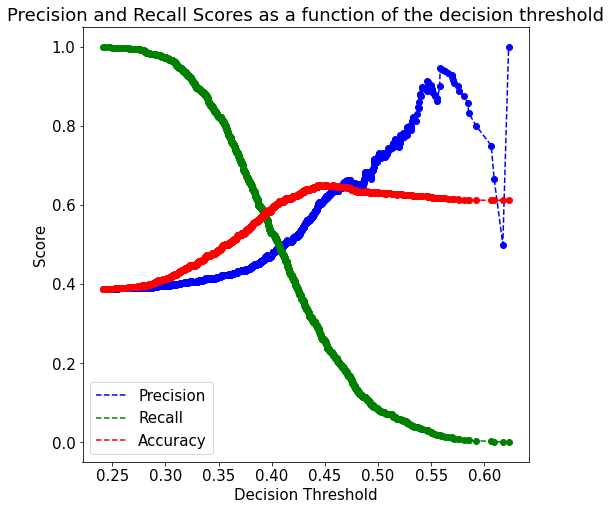

In [124]:
# Using out of bag to find predictions
ypred = model.oob_decision_function_[:,1]

# Calculating precision, recall, and thresholds using precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, ypred)
# Creating an array to store accuracy scores for different thresholds
acc=np.ndarray(shape=(len(thresholds),))
# Looping over the thresholds and calculating accuracy scores
i=0
for th in thresholds:
    y_pred = ypred>th
    y_pred=y_pred.astype(int)
    acc[i]=accuracy_score(y_pred, y_train)
    i = i+1
# Defining a function to plot precision, recall, and accuracy scores against decision thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.plot(thresholds, acc, "r--", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color='blue')
    plt.plot(thresholds, recalls[:-1], "o", color='green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc="best")
    plt.legend()
# Calling the function to plot precision, recall, and accuracy scores against thresholds
plot_precision_recall_vs_threshold(p, r, thresholds)

Accuracy:  64.46564885496183
ROC-AUC:  0.6237300991638645
Precision:  0.6018735362997658
Recall:  0.25245579567779963


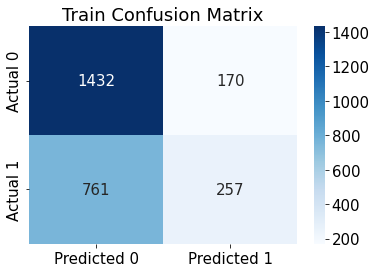

In [217]:
# Tune threshold on the train confusion matrix

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.45

y_pred_prob = cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=500, 
                          random_state=1,max_features=0.5, oob_score=True,
                        max_samples=0.25,n_jobs=-1,bootstrap=True,bootstrap_features=True), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  62.5
ROC-AUC:  0.6195027195027195
Precision:  0.5714285714285714
Recall:  0.2153846153846154


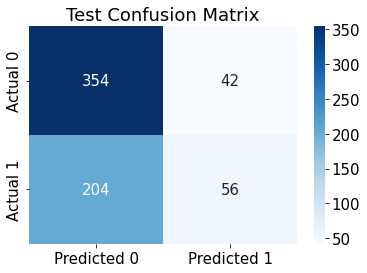

In [132]:
# Print the performance with the tuned threshold on test data

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.45
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

*The baseline untuned bagged decision tree performs better than both the corse-grid and fine-grid tuned bagged decision tree, when tuning for precision but attmepting to keep recall above 0.2. Therefore, the untuned bagged decision tree is selected for the ensemble model. This occurred in part because I conducted sequential tuning, in that I tuned the decision threshold after the hyperparameters. If I consider a threshold of 0.5 the precision on the fine-tuned model is better according to best precision through grid search. But because I'm tuning sequentially rather than simultaneously, the untuned model performs better.*

**Feature importances for baseline bagged decision tree**

In [220]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=400, random_state=1,
                        n_jobs=-1).fit(X_train, y_train)

In [226]:
# Get the feature importances for each base classifier in the ensemble
feature_importances = []
for base_classifier in model.estimators_:
    if hasattr(base_classifier, 'feature_importances_'):
        feature_importances.append(base_classifier.feature_importances_)

# Calculate the average feature importances across all base classifiers
avg_feature_importances = sum(feature_importances) / len(feature_importances)

# Create a dataframe with feature names and their corresponding importances
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']  # Replace with your actual feature names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': avg_feature_importances})

# Sort the dataframe by feature importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the dataframe
print(feature_importances_df)

           Feature  Importance
0               ph    0.139696
4          Sulfate    0.132495
1         Hardness    0.123635
3      Chloramines    0.121104
2           Solids    0.116699
7  Trihalomethanes    0.093565
5     Conductivity    0.093290
6   Organic_carbon    0.090085
8        Turbidity    0.089433


## Gradient Boosting

### Hyperparameter Visualization

Text(0.5, 0, 'Number of trees')

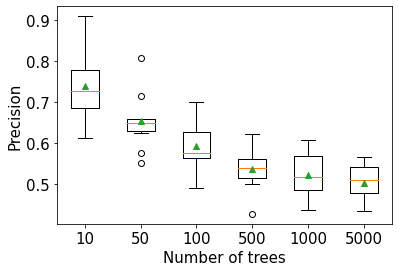

In [137]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model based on precision and collect the results
    scores = cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    #print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

Text(0.5, 0, 'Depth of each tree')

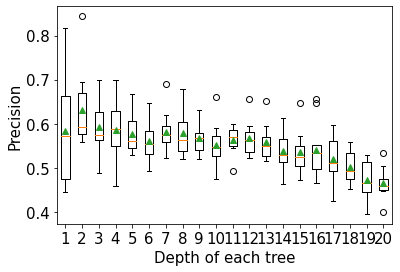

In [139]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 20
    for i in range(1,21):
        # define ensemble model
        models[str(i)] = GradientBoostingClassifier(random_state=1,max_depth=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    #print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

Text(0.5, 0, 'Learning rate')

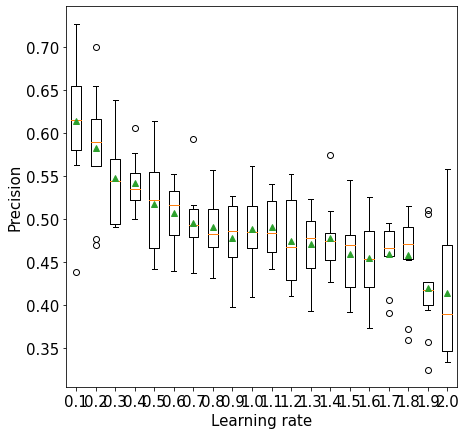

In [141]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for i in np.arange(0.1, 2.1, 0.1):
        key = '%.1f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    #print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Precision',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

>0.25 0.57 (0.03)
>0.50 0.58 (0.04)
>0.75 0.59 (0.02)
>1.00 0.61 (0.04)


Text(0.5, 0, 'Subsample')

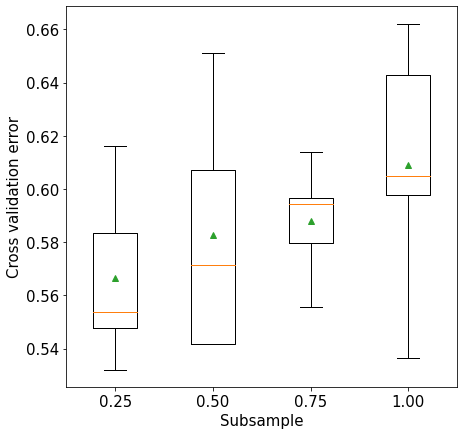

In [209]:
def get_models():
    models = dict()
    # explore learning rates from 0.1 to 2 in 0.1 increments
    for s in np.arange(0.25, 1.1, 0.25):
        key = '%.2f' % s
        models[key] = GradientBoostingClassifier(random_state=1,subsample=s)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = (cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.2f (%.2f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Subsample',fontsize=15)

### Hyperparameter Tuning

**Hyperparameter Tuning 1**

In [163]:
start_time = time.time()
#Define baseline model
model = GradientBoostingClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = [10,250, 500] #considering 3 values from 10-500
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['max_depth'] = range(4,9) #suggested max_depth for gradient boost is 4-8
grid['subsample'] = [0.5,0.75,1.0] 
# define the evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# Define a GridSearchCV object to search for optimal parameters from the param_grid
# The best model will be score based on precision
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, verbose = True, scoring = 'precision')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Time taken = ", time.time() - start_time, "seconds")

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

Best: 0.966667 using {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.75}
Time taken =  325.9352979660034 seconds


In [164]:
#Model based on the optimal parameters
model = GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.001,subsample=0.75,
                          n_estimators=250).fit(X_train,y_train)

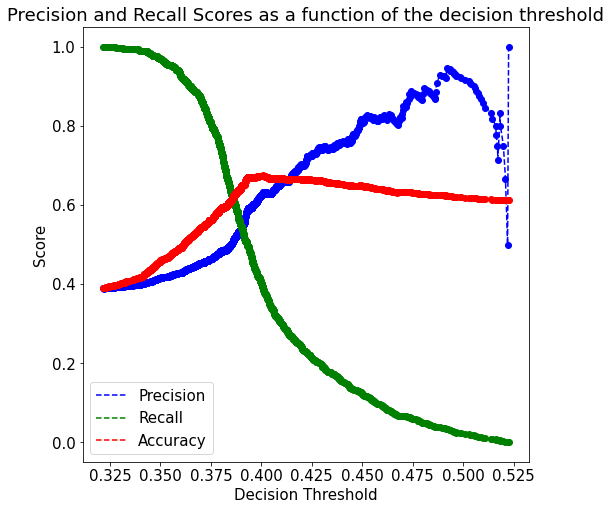

In [165]:
# Using cross_val_predict to obtain predicted probabilities of the positive class
cross_val_ypred=cross_val_predict(GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.001,subsample=0.75,
                          n_estimators=250), X_train,
                                 y_train, cv=5, method='predict_proba')

# Calculating precision, recall, and thresholds using precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:, 1])
# Creating an array to store accuracy scores for different thresholds
acc=np.ndarray(shape=(len(thresholds),))
# Looping over the thresholds and calculating accuracy scores
i=0
for th in thresholds:
    y_pred = cross_val_ypred[:, 1]>th
    y_pred=y_pred.astype(int)
    acc[i]=accuracy_score(y_pred, y_train)
    i = i+1
# Defining a function to plot precision, recall, and accuracy scores against decision thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.plot(thresholds, acc, "r--", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color='blue')
    plt.plot(thresholds, recalls[:-1], "o", color='green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc="best")
    plt.legend()
# Calling the function to plot precision, recall, and accuracy scores against thresholds
plot_precision_recall_vs_threshold(p, r, thresholds)

Accuracy:  66.48854961832062
ROC-AUC:  0.68554839358464
Precision:  0.7011494252873564
Recall:  0.23968565815324164


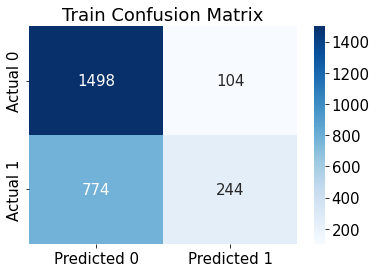

In [168]:
# Tune threshold on the train confusion matrix

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.42

y_pred_prob = cross_val_predict(GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.001,subsample=0.75,
                          n_estimators=250), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  65.70121951219512
ROC-AUC:  0.6607128982128982
Precision:  0.7272727272727273
Recall:  0.2153846153846154


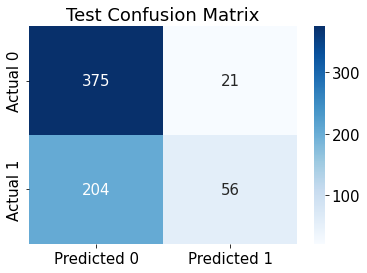

In [169]:
# Print the performance with the tuned threshold on test data

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.42
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

**Hyperparameter Tuning 2**

In [232]:
start_time = time.time()
#Define baseline model
model = GradientBoostingClassifier(random_state=1)
grid = dict()
grid['n_estimators'] = [200, 250, 300] #tried numbers in here a few different times, getting more specific each time
grid['learning_rate'] = [0.001] #limiting to what was chosen in tuning 1
grid['max_depth'] = [7] #limiting to what was chosen in tuning 1
grid['subsample'] = [0.6,0.75,0.85] #attempting to get more specific
grid['max_features'] = [0.5, 0.75, 1.0] #added this
# define the evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# Define a GridSearchCV object to search for optimal parameters from the param_grid
# The best model will be score based on precision
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, verbose = True, scoring = 'precision')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Time taken = ", time.time() - start_time, "seconds")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/catherineerickson/opt/anaconda3/lib/pyt

/Users/catherineerickson/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best: 0.966667 using {'learning_rate': 0.001, 'max_depth': 7, 'max_features': 1.0, 'n_estimators': 250, 'subsample': 0.75}
Time taken =  42.228116035461426 seconds


In [233]:
#Model based on the optimal parameters
model = GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.001,subsample=0.75,
                          max_features=1.0, n_estimators=250).fit(X_train,y_train)

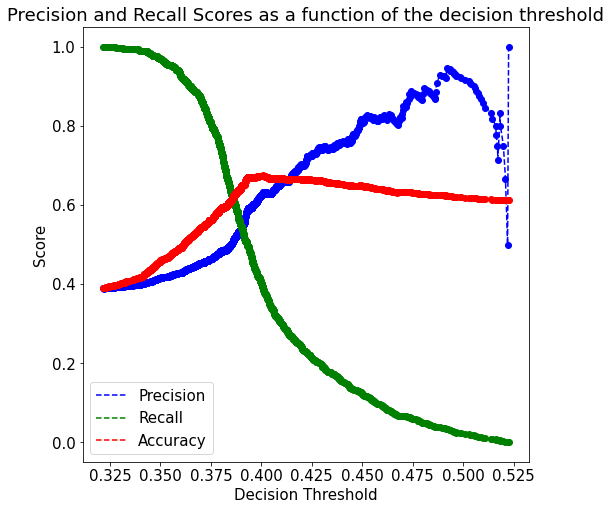

In [234]:
# Using cross_val_predict to obtain predicted probabilities of the positive class
cross_val_ypred=cross_val_predict(GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.001,subsample=0.75,
                          max_features=1.0, n_estimators=250), X_train,
                                 y_train, cv=5, method='predict_proba')

# Calculating precision, recall, and thresholds using precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:, 1])
# Creating an array to store accuracy scores for different thresholds
acc=np.ndarray(shape=(len(thresholds),))
# Looping over the thresholds and calculating accuracy scores
i=0
for th in thresholds:
    y_pred = cross_val_ypred[:, 1]>th
    y_pred=y_pred.astype(int)
    acc[i]=accuracy_score(y_pred, y_train)
    i = i+1
# Defining a function to plot precision, recall, and accuracy scores against decision thresholds
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.plot(thresholds, acc, "r--", label="Accuracy")
    plt.plot(thresholds, precisions[:-1], "o", color='blue')
    plt.plot(thresholds, recalls[:-1], "o", color='green')
    plt.plot(thresholds, acc, "o", color = 'red')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc="best")
    plt.legend()
# Calling the function to plot precision, recall, and accuracy scores against thresholds
plot_precision_recall_vs_threshold(p, r, thresholds)

Accuracy:  66.48854961832062
ROC-AUC:  0.68554839358464
Precision:  0.7011494252873564
Recall:  0.23968565815324164


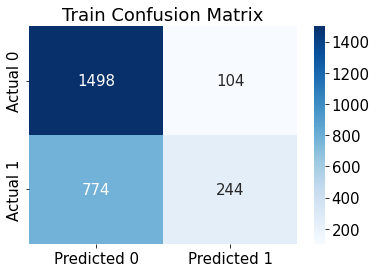

In [235]:
# Tune threshold on the train confusion matrix

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.42

y_pred_prob = cross_val_predict(GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.001,subsample=0.75,
                          max_features=1.0, n_estimators=250), X_train,
                                 y_train, cv=5, method='predict_proba')[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_train)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_train, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_train, y_pred))
print("Recall: ", recall_score(y_train, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Train Confusion Matrix")
plt.show()

Accuracy:  65.70121951219512
ROC-AUC:  0.6607128982128982
Precision:  0.7272727272727273
Recall:  0.2153846153846154


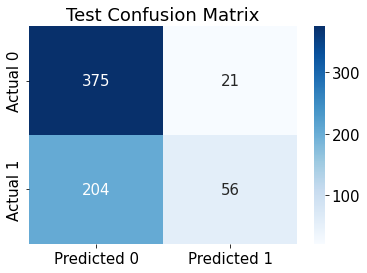

In [236]:
# Print the performance with the tuned threshold on test data

# Performance metrics computation for the optimum decision threshold probability
desired_threshold = 0.42
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Classifying observations in the positive class (y = 1) if the predicted probability is greater
# than the desired decision threshold probability
y_pred = y_pred_prob > desired_threshold
y_pred = y_pred.astype(int)

#Computing the accuracy
print("Accuracy: ",accuracy_score(y_pred, y_test)*100)  

#Computing the ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print("ROC-AUC: ",auc(fpr, tpr))# AUC of ROC

#Computing the precision and recall
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

#Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=['Predicted 0', 'Predicted 1'], index = ['Actual 0', 'Actual 1'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g');
plt.title("Test Confusion Matrix")
plt.show()

*This was followed by more rounds of finer-grid tuning, but still nothing changed.*

## Model Ensemble 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**


### Final Models for Ensembling

**Bagged Decision Tree**

In [184]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=400, random_state=1,
                        n_jobs=-1).fit(X_train, y_train)

**Gradient Boosting**

In [188]:
model = GradientBoostingClassifier(random_state=1,max_depth=7,learning_rate=0.001,subsample=0.75,
                          max_features=1.0, n_estimators=250).fit(X_train,y_train)

### Voting ensemble

### Stacking ensemble(s)

### Ensemble of ensembled models

### Innovative ensembling methods
*(Optional)*

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.